In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline

In [1]:
import pickle
with open('graph.pickle', 'rb') as f:
    G = pickle.load(f)


In [9]:
from deepwalk.models.deepwalk import DeepWalk

In [10]:
model = DeepWalk(G, walk_length=10, num_walks=80, workers=1)
model.train(window_size=5, iter=3)
embeddings = model.get_embeddings()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


Learning embedding vectors...
Learning embedding vectors done!


In [22]:
# embeddings
words = []
embeds = []
for keyval in embeddings.items():
    words.append(keyval[0])
    embeds.append(keyval[1])
    
words = np.array(words)
embeds = np.array(embeds)

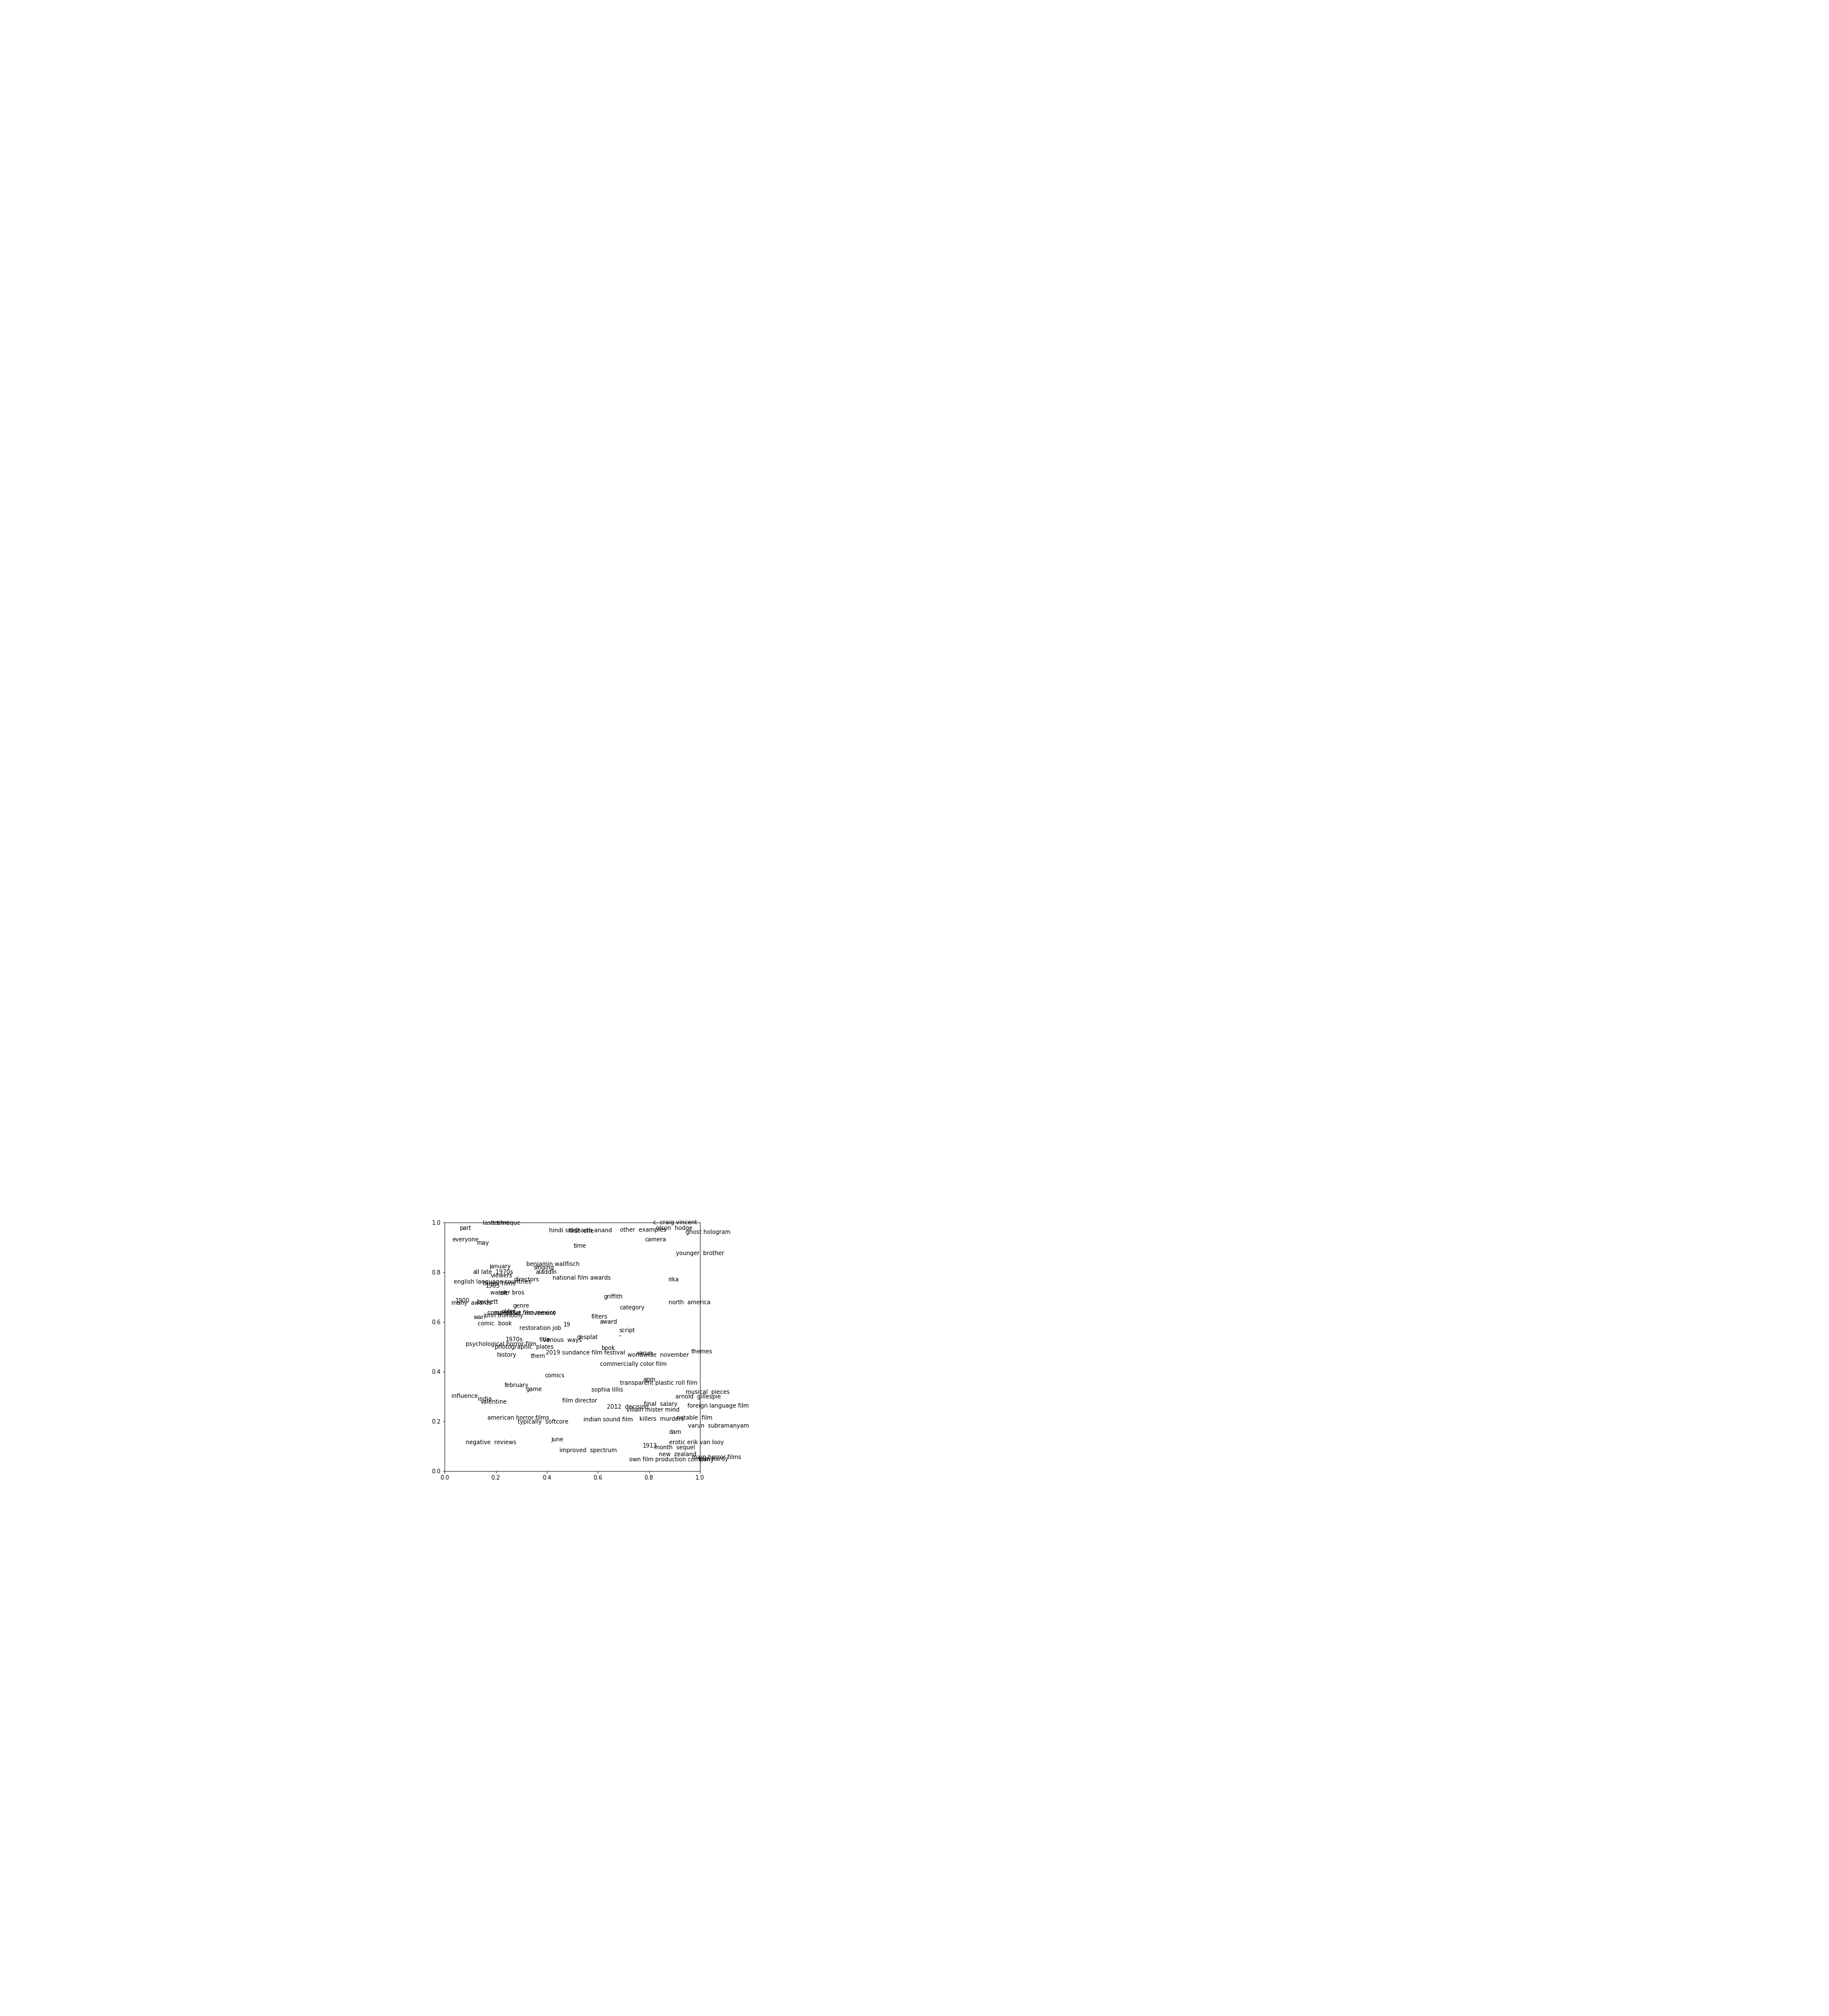

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(embeds)

plt.figure(figsize=(8, 8))


for i, word in enumerate(words):
    if i < 1000:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        
plt.savefig('annotateddeepwalk.png', dpi=150)
# plt.scatter(result[:, 0], result[:, 1], s=1)

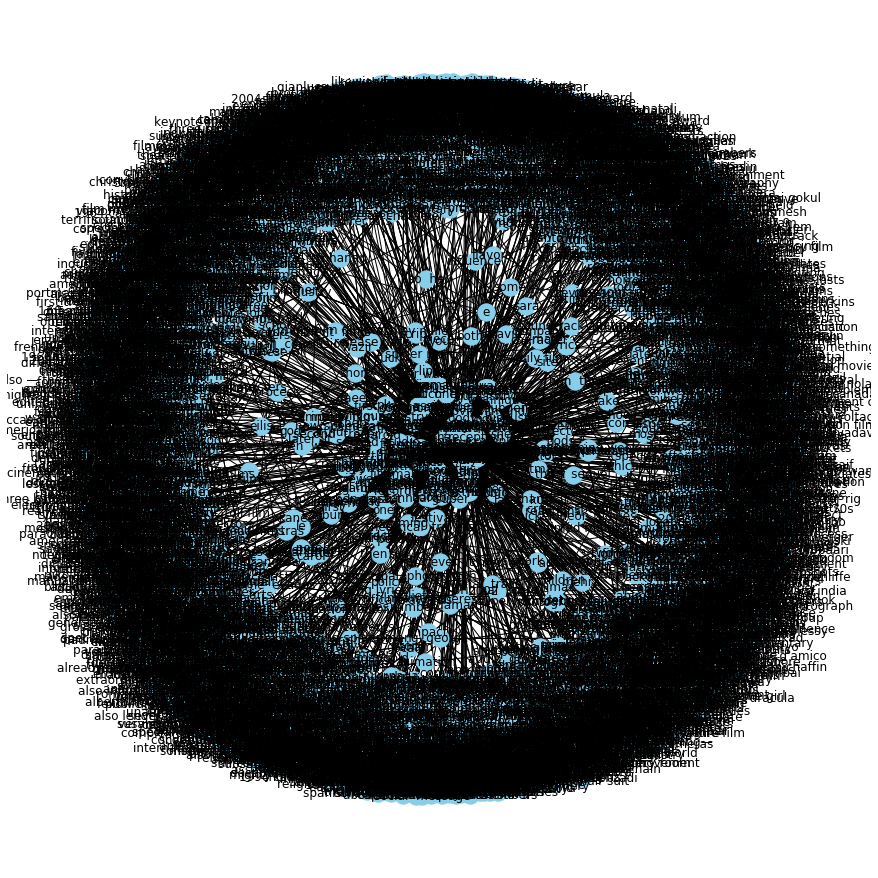

In [7]:
# plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G)
# nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# plt.show()